In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import binom,poisson,geom,expon,norm

In [2]:
wal = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')

In [13]:
wal.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [8]:
len(wal)   #checking the number of rows of data

550068

In [23]:
wal.shape  #checking the structure of data

(550068, 10)

In [14]:
wal.dtypes   #checking the datatypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [16]:
wal.nunique()  #checking on the no of unique datas

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [22]:
wal['Gender'].value_counts()  #getting the counts based on gender

M    414259
F    135809
Name: Gender, dtype: int64

In [26]:
wal.isnull().sum()  #checking null values for each column 

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [27]:
wal.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchase'>

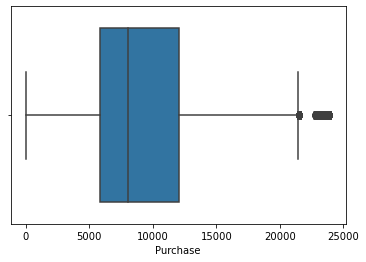

In [29]:
sns.boxplot(wal['Purchase'])   #checking for outliers

In [39]:
wal[wal['Purchase']>21000].count()[0]

3541

546522


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchase'>

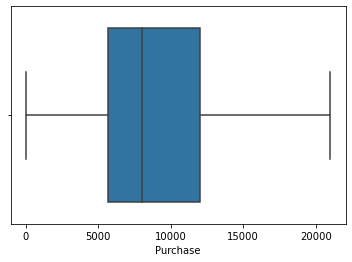

In [46]:
#filtering out the outliers

wal_1 = wal[wal['Purchase']<21000]
print(wal_1.count()[0])
sns.boxplot(wal_1['Purchase'])

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

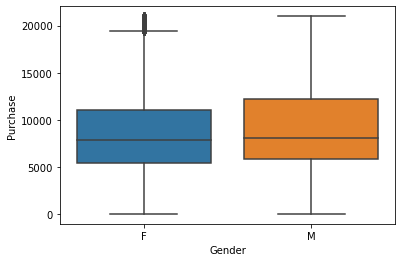

In [59]:
#bivariate analysis
sns.boxplot(x='Gender',y='Purchase',data=wal_1)

#Males have a slight high spending and high median spending as compared to females


<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

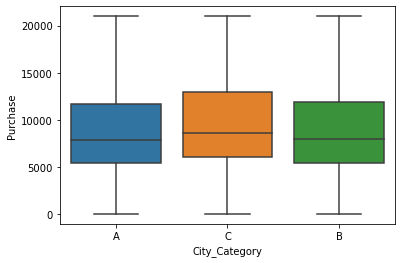

In [52]:
#bivariate analysis
sns.boxplot(x='City_Category',y='Purchase',data=wal_1)


#In terms of spending based on the city C has been the highest while A nd B has been some what similar

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

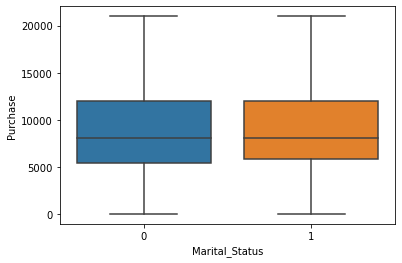

In [57]:
#bivariate analysis
sns.boxplot(x='Marital_Status',y='Purchase',data=wal_1)
#married and unmarried both have have spent nearly equal amount there s no major difference in the amount spending 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

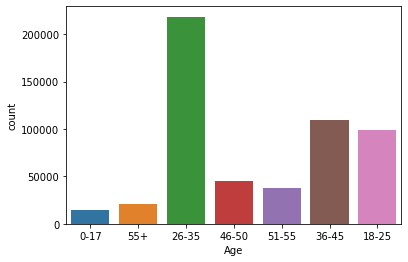

In [63]:
# distribution of age 
sns.countplot(wal_1['Age'])

#Most of the customers are in the age span of 26-35

<AxesSubplot:>

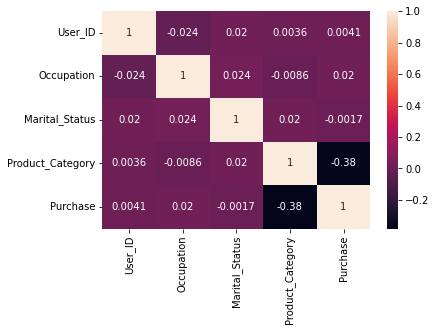

In [72]:
#Corellation of all fields 
sns.heatmap(wal_1.corr(),annot=True)

In [75]:
pd.crosstab(index=wal_1['City_Category'],columns=wal_1['Stay_In_Current_City_Years'])

#Most of the customers have live in B category city for most of the times

Stay_In_Current_City_Years,0,1,2,3,4+
City_Category,,,,,
A,24005,49021,26952,24629,22186
B,28538,82853,41536,42439,34399
C,21384,60655,32733,27591,27601


In [81]:
wal_1['Marital_Status'].value_counts()

#Unmarried customers are more in comparision to married customers

0    322753
1    223769
Name: Marital_Status, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category', ylabel='count'>

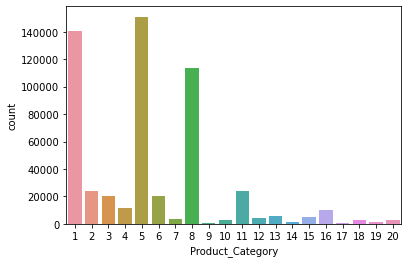

In [84]:
sns.countplot(wal_1['Product_Category'])

#Product 1,5 are the most selled products category followed by 8 having significant greater sales no

In [85]:
wal_f = wal_1[wal_1['Gender']=='F']
wal_m = wal_1[wal_1['Gender']=='M']

In [97]:
print('No of Females are:',len(wal_m))
print('No of Females are:',len(wal_f))

No of Females are: 411466
No of Females are: 135056


# Comparing males and females spendings and means

In [113]:
print('Spending of males per transaction: ',sum(wal_m['Purchase'])//len(wal_m))
print('Spending of Females per transaction: ',sum(wal_f['Purchase'])//len(wal_f))


Spending of males per transaction:  9347
Spending of Females per transaction:  8655


Females have spent less than the males on an average 

In [110]:
#Spending based on the city_categories
###For A category

print('Spending of males per transaction: ',sum(wal_m[wal_m['City_Category']=='A']['Purchase'])/len(wal_m[wal_m['City_Category']=='A']))
print('Spending of Females per transaction: ',sum(wal_f[wal_f['City_Category']=='A']['Purchase'])/len(wal_f[wal_f['City_Category']=='A']))


Spending of males per transaction:  8929.132200587637
Spending of Females per transaction:  8498.371915492959


In [111]:
###For B category

print('Spending of males per transaction: ',sum(wal_m[wal_m['City_Category']=='B']['Purchase'])/len(wal_m[wal_m['City_Category']=='B']))
print('Spending of Females per transaction: ',sum(wal_f[wal_f['City_Category']=='B']['Purchase'])/len(wal_f[wal_f['City_Category']=='B']))


Spending of males per transaction:  9268.098028515698
Spending of Females per transaction:  8469.2243822706


In [112]:
###For C category

print('Spending of males per transaction: ',sum(wal_m[wal_m['City_Category']=='C']['Purchase'])/len(wal_m[wal_m['City_Category']=='C']))
print('Spending of Females per transaction: ',sum(wal_f[wal_f['City_Category']=='C']['Purchase'])/len(wal_f[wal_f['City_Category']=='C']))


Spending of males per transaction:  9818.398789840287
Spending of Females per transaction:  9044.1139439199


#Spending in city C is comparitively more as compared to TIER A AND B cities.


Text(0, 0.5, 'Sample Mean')

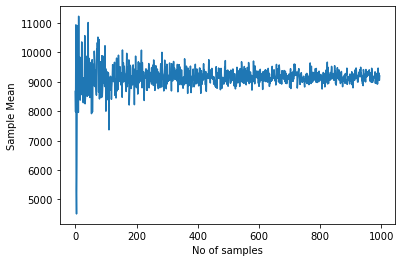

In [125]:
#Mean variance reducing as we increase the number of samples thus giving more closer/accurate values 
sample_mean_trend = []
for num_samples in range(5,1000):
    sample = wal_1['Purchase'].sample(num_samples)
    sample_mean = np.mean(sample)
    sample_mean_trend.append(sample_mean)
plt.plot(sample_mean_trend)
plt.xlabel('No of samples')
plt.ylabel('Sample Mean')

# confidence interval

<AxesSubplot:ylabel='Count'>

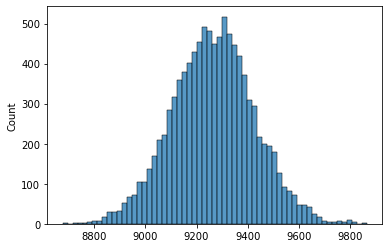

In [131]:
num_samples = 1000
num_times = 10000
sample_means = []
for i in range(num_times):
    sample = wal['Purchase'].sample(num_samples)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)
sns.histplot(sample_means)


In [132]:
pop_mu = wal_1['Purchase'].mean()
pop_std = wal_1['Purchase'].std()

In [133]:
#at first calculating the zeta value using which we will get left and right range values
left_z = round(norm.ppf(0.025),2)
right_z = round(norm.ppf(0.975),2)
print(f"Range of z values: [{left_z}, {right_z}]")

Range of z values: [-1.96, 1.96]


In [136]:
left = round(left_z * pop_std/np.sqrt(num_samples) + pop_mu,2)
right = round(right_z * pop_std/np.sqrt(num_samples) + pop_mu,2)

print(f"With 95% confidence interval we can say that the spending lies between {left} and {right}")

With 95% confidence interval we can say that the spending lies between 8871.66 and 9481.5


<AxesSubplot:ylabel='Count'>

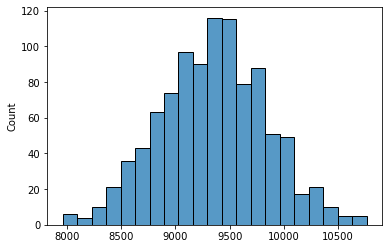

In [138]:
#For males the spending range is

num_samples = 100
num_times = 1000
sample_means = []
for i in range(num_times):
    sample = wal_m['Purchase'].sample(num_samples)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)
sns.histplot(sample_means)

In [141]:
pop_mu = wal_m['Purchase'].mean()
pop_std = wal_m['Purchase'].std()

left = round(left_z * pop_std/np.sqrt(num_samples) + pop_mu,2)
right = round(right_z * pop_std/np.sqrt(num_samples) + pop_mu,2)

print(f"With 95% confidence interval we can say that the spending for males lies between {left} and {right}")

With 95% confidence interval we can say that the spending for males lies between 8369.53 and 10325.45


With 95% confidence interval we can say that the spending for females lies between 7742.2 and 9569.53


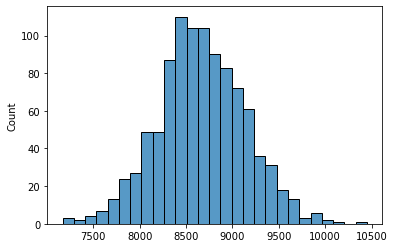

In [142]:
#For females the spending range is

num_samples = 100
num_times = 1000
sample_means = []
for i in range(num_times):
    sample = wal_f['Purchase'].sample(num_samples)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)
sns.histplot(sample_means)


pop_mu = wal_f['Purchase'].mean()
pop_std = wal_f['Purchase'].std()

left = round(left_z * pop_std/np.sqrt(num_samples) + pop_mu,2)
right = round(right_z * pop_std/np.sqrt(num_samples) + pop_mu,2)

print(f"With 95% confidence interval we can say that the spending for females lies between {left} and {right}")

From the above analysis it states that the mean of the expenses of males are higher than females.

In [143]:
###We can also find from the above analysis that the spending of males and females are overlaping each other as  for males
#it ranges between 8k to 10k approx while for females it is 7l to 9k

From the above analysis walmart can focus more on males products as the mean spending range of men is higher than the females.So they can introduce more no of males products.Based on the crosstab result of gender and product category as shown above walmart ca get a clear picture of the product categories that males are more into.They can fosus on introducing more variety of those to gain more.And as per females they should introduce more offers and categories of product to gain more sales amount.

# For married and unmarried couples 

In [150]:
wal_mr = wal_1[wal['Marital_Status']==1]
wal_u = wal_1[wal['Marital_Status']==0]

C:\Users\SAKUMARDASH\AppData\Local\Temp\ipykernel_6780\2641535137.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wal_mr = wal_1[wal['Marital_Status']==1]
C:\Users\SAKUMARDASH\AppData\Local\Temp\ipykernel_6780\2641535137.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wal_u = wal_1[wal['Marital_Status']==0]


Range of z values: [-1.64, 1.64]
With 90% confidence interval we can say that the spending for married's lies between 8362.35 and 9971.04


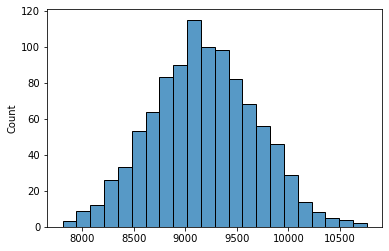

In [151]:
#For married's the spending range is

num_samples = 100
num_times = 1000
sample_means = []
for i in range(num_times):
    sample = wal_mr['Purchase'].sample(num_samples)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)
sns.histplot(sample_means)


pop_mu = wal_mr['Purchase'].mean()
pop_std = wal_mr['Purchase'].std()

#calculating z for 90% confidence
left_z = round(norm.ppf(0.05),2)
right_z = round(norm.ppf(0.95),2)
print(f"Range of z values: [{left_z}, {right_z}]")

left = round(left_z * pop_std/np.sqrt(num_samples) + pop_mu,2)
right = round(right_z * pop_std/np.sqrt(num_samples) + pop_mu,2)

print(f"With 90% confidence interval we can say that the spending for married's lies between {left} and {right}")

Range of z values: [-1.64, 1.64]
With 90% confidence interval we can say that the spending for Unmarried's lies between 8374.91 and 9991.96


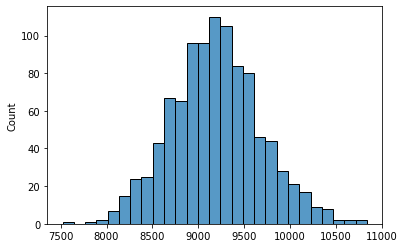

In [153]:
#For married's the spending range is

num_samples = 100
num_times = 1000
sample_means = []
for i in range(num_times):
    sample = wal_u['Purchase'].sample(num_samples)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)
sns.histplot(sample_means)


pop_mu = wal_u['Purchase'].mean()
pop_std = wal_u['Purchase'].std()

#calculating z for 90% confidence
left_z = round(norm.ppf(0.05),2)
right_z = round(norm.ppf(0.95),2)
print(f"Range of z values: [{left_z}, {right_z}]")

left = round(left_z * pop_std/np.sqrt(num_samples) + pop_mu,2)
right = round(right_z * pop_std/np.sqrt(num_samples) + pop_mu,2)

print(f"With 90% confidence interval we can say that the spending for Unmarried's lies between {left} and {right}")

From comparision of married to unmarried using 90% confidence interval we get both are spending equal mean range of spendings. The mean spending of both married and unmarried's almost completely overlap as seen from the 90% confidence intervals.This states that the sales for both the groups are well managed and has been giving equal results.

# For Age groups

In [160]:
wal_1['Age'].unique() #gives the unique values of age

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [171]:
wal_17 = wal_1[wal_1['Age'] =='0-17']
wal_25 = wal_1[wal_1['Age'] =='18-25']
wal_45 = wal_1[wal_1['Age'] =='36-45']

Range of z values: [-1.64, 1.64]
With 90% confidence interval we can say that the spending for age between 0 and 17 lies between 8026.83 and 9670.37


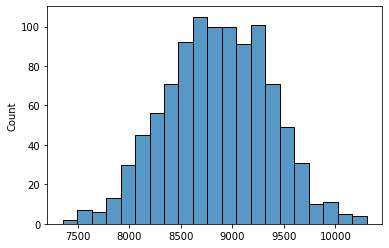

In [168]:
#For married's the spending range is

num_samples = 100
num_times = 1000
sample_means = []
for i in range(num_times):
    sample = wal_17['Purchase'].sample(num_samples)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)
sns.histplot(sample_means)


pop_mu = wal_17['Purchase'].mean()
pop_std = wal_17['Purchase'].std()

#calculating z for 90% confidence
left_z = round(norm.ppf(0.05),2)
right_z = round(norm.ppf(0.95),2)
print(f"Range of z values: [{left_z}, {right_z}]")

left = round(left_z * pop_std/np.sqrt(num_samples) + pop_mu,2)
right = round(right_z * pop_std/np.sqrt(num_samples) + pop_mu,2)

print(f"With 90% confidence interval we can say that the spending for age between 0 and 17 lies between {left} and {right}")

Range of z values: [-1.64, 1.64]
With 90% confidence interval we can say that the spending for age between 18 and 25 lies between 8294.41 and 9922.28


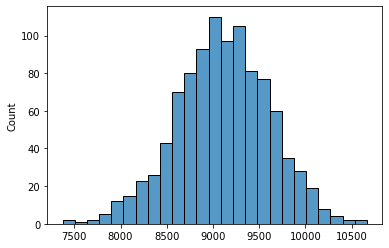

In [170]:
#For married's the spending range is

num_samples = 100
num_times = 1000
sample_means = []
for i in range(num_times):
    sample = wal_25['Purchase'].sample(num_samples)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)
sns.histplot(sample_means)


pop_mu = wal_25['Purchase'].mean()
pop_std = wal_25['Purchase'].std()

#calculating z for 90% confidence
left_z = round(norm.ppf(0.05),2)
right_z = round(norm.ppf(0.95),2)
print(f"Range of z values: [{left_z}, {right_z}]")

left = round(left_z * pop_std/np.sqrt(num_samples) + pop_mu,2)
right = round(right_z * pop_std/np.sqrt(num_samples) + pop_mu,2)

print(f"With 90% confidence interval we can say that the spending for age between 18 and 25 lies between {left} and {right}")

Range of z values: [-1.64, 1.64]
With 90% confidence interval we can say that the spending for age between 36 and 45 lies between 8428.65 and 10038.06


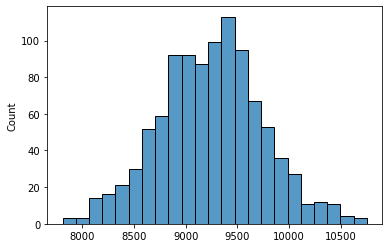

In [172]:
#For married's the spending range is

num_samples = 100
num_times = 1000
sample_means = []
for i in range(num_times):
    sample = wal_45['Purchase'].sample(num_samples)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)
sns.histplot(sample_means)


pop_mu = wal_45['Purchase'].mean()
pop_std = wal_45['Purchase'].std()

#calculating z for 90% confidence
left_z = round(norm.ppf(0.05),2)
right_z = round(norm.ppf(0.95),2)
print(f"Range of z values: [{left_z}, {right_z}]")

left = round(left_z * pop_std/np.sqrt(num_samples) + pop_mu,2)
right = round(right_z * pop_std/np.sqrt(num_samples) + pop_mu,2)

print(f"With 90% confidence interval we can say that the spending for age between 36 and 45 lies between {left} and {right}")

From the analysis of ages between three groups clearly the age group of 36-46 has more mean spending than the others.Walmart should focus more on the lower age groups who are below 36 to improve their sales.Their primary focus should be on the product category lagging for the age groups below 36.